In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import linregress

# ヨーロッパ各国における自動車運輸部門のエネルギー消費量と自動車登録台数

## ヨーロッパの自動車運輸部門のエネルギー消費量(TJ)@2022年

source

https://ec.europa.eu/eurostat/databrowser/view/nrg_d_traq__custom_13163020/bookmark/table?lang=en&bookmarkId=39d845e8-a66f-4ae6-8886-e1d94ad40e78

In [38]:
df_energy = pd.read_excel("data/transportation/nrg_d_traq__custom_13163020_page_spreadsheet.xlsx", sheet_name="Sheet 1", skiprows=10, index_col=0)
df_energy = df_energy.dropna(how="all", axis=1).dropna(how="all", axis=0)
df_energy = df_energy.iloc[:-1, :]
# remove Georgia since there is data unavailabe
df_energy = df_energy.drop("Georgia")
# remove Greece since the all the columns are 0
df_energy = df_energy.drop("Greece")
# change the data type to float
df_energy = df_energy.astype(float)
# make sum column
df_energy["sum"] = df_energy.sum(axis=1)
# Change the name of the country to match the vehicle data
df_energy = df_energy.rename(index={"Czechia": "Czech Republic"})
df_energy

c:\Users\ys11m\Documents\GitHub\JED_validation\.venv\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Natural gas,Liquefied petroleum gases,Motor gasoline (excluding biofuel portion),Gas oil and diesel oil (excluding biofuel portion),Renewables and biofuels,Electricity,sum
SIEC (Labels),,,,,,,
Belgium,2651.400,2024.440,87024.249,195597.445,33585.280,1715.400,322598.214
Bulgaria,2690.318,18392.502,21431.048,88309.879,7961.104,164.743,138949.594
Czech Republic,3173.835,3723.000,65602.077,187996.300,14750.622,261.176,275507.010
Denmark,459.419,0.000,50180.738,95042.201,9781.775,1400.793,156864.926
Germany,6471.742,6331.878,642544.357,1223461.446,126219.727,8837.669,2013866.819
Estonia,694.696,458.408,8538.480,23260.500,1597.159,72.000,34621.243
Ireland,0.000,67.905,29200.140,112071.419,9372.081,545.504,151257.049
Spain,9272.700,5084.230,243748.523,835086.330,39872.055,1893.600,1134957.438
France,13340.948,3846.566,371037.607,1217270.999,128013.530,5083.326,1738592.976


## 世界の自動車登録台数(年数がバラバラなことに注意)

source

https://en.wikipedia.org/wiki/List_of_countries_and_territories_by_motor_vehicles_per_capita

In [39]:
import re
# Read the text file
file_path = "data/transportation/vehicle.txt"
with open(file_path, "r", encoding="utf-8") as f:
    lines = f.readlines()

# Extract header
header = lines[0].strip().replace("\t", ",")

# Extract country data
data = [header]  # Start with header
for line in lines[1:]:  # Skip header line
    line = re.sub(r'(\d),(\d)', r'\1\2', line) # Remove comma in numbers
    line_data = line.strip().split("\t")
    data.append(",".join(line_data))

# Save to CSV file
csv_path = "data/transportation/vehicle.csv"
with open(csv_path, "w", encoding="utf-8") as f:
    f.write("\n".join(data))

# Load the CSV file
df_vehicles = pd.read_csv(csv_path, index_col=0)
df_vehicles

,Rate,Vehicles,Population,Year,Ref
Location,,,,,
China,310.0,440000000,1419321278,2024,[57]
United States,850.0,283400986,333287557,2022,[11][12]
India,158.0,210023289,1328024498,2015,[30]
Brazil,462.0,93867016,203218114,2016,[30]
Japan,670.0,82876295,123753041,2024,[24]
...,...,...,...,...,...
Micronesia,99.0,11014,110917,2020,[80]
Solomon Islands,21.0,11000,532968,2010,[91]
Greenland (Denmark),126.0,7054,55923,2023,[34]


In [40]:
# Add Greenland(Denmark) and Faroe Islands(Denmark) to Denmark in the vehicle data
print(df_vehicles.loc["Denmark",:])
df_vehicles.loc["Denmark", "Vehicles"] += df_vehicles.loc["Greenland (Denmark)", "Vehicles"]
df_vehicles.loc["Denmark", "Population"] += df_vehicles.loc["Greenland (Denmark)", "Population"]
df_vehicles.loc["Denmark", "Vehicles"] += df_vehicles.loc["Faroe Islands (Denmark)", "Vehicles"]
df_vehicles.loc["Denmark", "Population"] += df_vehicles.loc["Faroe Islands (Denmark)", "Population"]
df_vehicles.loc["Denmark", "Rate"] = df_vehicles.loc["Denmark", "Vehicles"] / df_vehicles.loc["Denmark", "Population"] * 1000
df_vehicles = df_vehicles.drop(["Greenland (Denmark)", "Faroe Islands (Denmark)"])
print("after adding Greenland and Faroe Islands to Denmark")
print(df_vehicles.loc["Denmark",:])

Rate            542.0
Vehicles      3222575
Population    5948137
Year             2023
Ref              [34]
Name: Denmark, dtype: object
after adding Greenland and Faroe Islands to Denmark
Rate          537.764076
Vehicles         3258191
Population       6058774
Year                2023
Ref                 [34]
Name: Denmark, dtype: object


In [41]:
# Extract data rows from vehicle data according to the countries in the energy data
df_vehicles_eu = df_vehicles.loc[df_energy.index]
df_vehicles_eu

,Rate,Vehicles,Population,Year,Ref
SIEC (Labels),,,,,
Belgium,599.000000,6977664,11641820,2022,[19]
Bulgaria,466.000000,3006215,6447710,2023,[32][33]
Czech Republic,664.000000,7082522,10673213,2022,[19]
Denmark,537.764076,3258191,6058774,2023,[34]
Germany,627.000000,52714433,84086227,2022,[19]
Estonia,740.000000,998852,1350092,2022,[19]
Ireland,536.000000,2737924,5110016,2022,[19]
Spain,642.000000,30724166,47828383,2022,[19]
France,671.000000,44444965,66277409,2022,[19]


## プロット

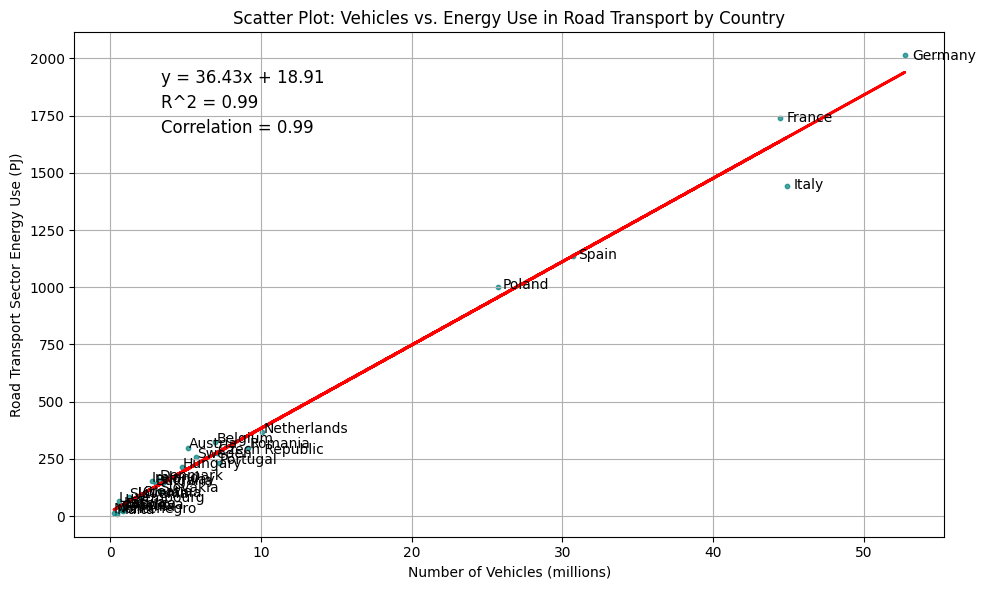

In [42]:
# 'vehicles' is the total number of vehicles for each country. (in millions)
# 'energy' is the corresponding energy use in the transport sector (in petajoules, PJ).

countries = df_vehicles_eu.index
vehicles = df_vehicles_eu["Vehicles"] / 1000000
energy = df_energy["sum"] / 1000

plt.figure(figsize=(10, 6))
plt.scatter(vehicles, energy, color='teal', s=10, alpha=0.7)

# Annotate each point with the country name.
for i, country in enumerate(countries):
    plt.text(vehicles.iloc[i] * 1.01, energy.iloc[i] * 0.99, country, fontsize=10)

plt.xlabel("Number of Vehicles (millions)")
plt.ylabel("Road Transport Sector Energy Use (PJ)")
plt.title("Scatter Plot: Vehicles vs. Energy Use in Road Transport by Country")
plt.grid(True)
plt.tight_layout()

# show trend line, equation, R^2, and correlation coefficient
slope, intercept, r_value, p_value, std_err = linregress(vehicles, energy)
plt.plot(vehicles, slope * vehicles + intercept, color='red', linewidth=2)
plt.text(0.1, 0.9, f"y = {slope:.2f}x + {intercept:.2f}", color='black', fontsize=12, transform=plt.gca().transAxes)
plt.text(0.1, 0.85, f"R^2 = {r_value**2:.2f}", color='black', fontsize=12, transform=plt.gca().transAxes)
plt.text(0.1, 0.8, f"Correlation = {r_value:.2f}", color='black', fontsize=12, transform=plt.gca().transAxes)

plt.show()

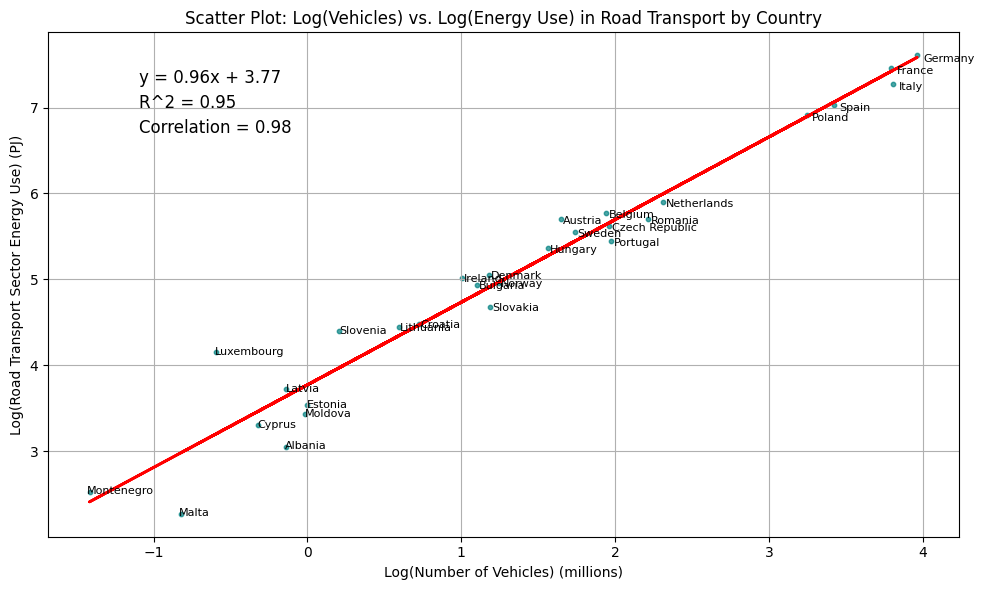

In [43]:
# Apply log transformation to the data
vehicles_log = np.log(vehicles)
energy_log = np.log(energy)

plt.figure(figsize=(10, 6))
plt.scatter(vehicles_log, energy_log, color='teal', s=10, alpha=0.7)

# Annotate each point with the country name.
for i, country in enumerate(countries):
    plt.text(vehicles_log.iloc[i] * 1.01, energy_log.iloc[i] * 0.99, country, fontsize=8)

plt.xlabel("Log(Number of Vehicles) (millions)")
plt.ylabel("Log(Road Transport Sector Energy Use) (PJ)")
plt.title("Scatter Plot: Log(Vehicles) vs. Log(Energy Use) in Road Transport by Country")
plt.grid(True)
plt.tight_layout()

# show trend line, equation, R^2, and correlation coefficient
slope, intercept, r_value, p_value, std_err = linregress(vehicles_log, energy_log)
plt.plot(vehicles_log, slope * vehicles_log + intercept, color='red', linewidth=2)
plt.text(0.1, 0.9, f"y = {slope:.2f}x + {intercept:.2f}", color='black', fontsize=12, transform=plt.gca().transAxes)
plt.text(0.1, 0.85, f"R^2 = {r_value**2:.2f}", color='black', fontsize=12, transform=plt.gca().transAxes)
plt.text(0.1, 0.8, f"Correlation = {r_value:.2f}", color='black', fontsize=12, transform=plt.gca().transAxes)

plt.show()



# アメリカにおける運輸部門のエネルギー消費量と自動車登録台数 (鉄道と分けられていないが，今日のアメリカはほぼ鉄道がない)

## アメリカの運輸部門のエネルギー消費量(Trillion Btu)

source

https://www.eia.gov/totalenergy/data/annual/

In [44]:
file_path = "data/transportation/MER_T02_05.csv"
df = pd.read_csv(file_path)
df

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,CLACBUS,194913,1727.246,1,Coal Consumed by the Transportation Sector,Trillion Btu
1,CLACBUS,195013,1563.933,1,Coal Consumed by the Transportation Sector,Trillion Btu
2,CLACBUS,195113,1378.693,1,Coal Consumed by the Transportation Sector,Trillion Btu
3,CLACBUS,195213,984.04,1,Coal Consumed by the Transportation Sector,Trillion Btu
4,CLACBUS,195313,732.992,1,Coal Consumed by the Transportation Sector,Trillion Btu
...,...,...,...,...,...,...
6965,TEACBUS,202406,2344.255,10,Total Energy Consumed by the Transportation Se...,Trillion Btu
6966,TEACBUS,202407,2499.549,10,Total Energy Consumed by the Transportation Se...,Trillion Btu
6967,TEACBUS,202408,2491.256,10,Total Energy Consumed by the Transportation Se...,Trillion Btu
6968,TEACBUS,202409,2298.313,10,Total Energy Consumed by the Transportation Se...,Trillion Btu


In [45]:
# Extract the data for the year 2022, which is from 202201 to 202212
df_2022 = df.loc[df["YYYYMM"].between(202201, 202212)]
df_2022 = df_2022.loc[df_2022["Description"] == "Total Energy Consumed by the Transportation Sector"]
df_2022


,MSN,YYYYMM,Value,Column_Order,Description,Unit
6934,TEACBUS,202201,2175.368,10,Total Energy Consumed by the Transportation Se...,Trillion Btu
6935,TEACBUS,202202,2070.521,10,Total Energy Consumed by the Transportation Se...,Trillion Btu
6936,TEACBUS,202203,2369.699,10,Total Energy Consumed by the Transportation Se...,Trillion Btu
6937,TEACBUS,202204,2248.798,10,Total Energy Consumed by the Transportation Se...,Trillion Btu
6938,TEACBUS,202205,2386.419,10,Total Energy Consumed by the Transportation Se...,Trillion Btu
6939,TEACBUS,202206,2356.268,10,Total Energy Consumed by the Transportation Se...,Trillion Btu
6940,TEACBUS,202207,2363.457,10,Total Energy Consumed by the Transportation Se...,Trillion Btu
6941,TEACBUS,202208,2460.847,10,Total Energy Consumed by the Transportation Se...,Trillion Btu
6942,TEACBUS,202209,2307.538,10,Total Energy Consumed by the Transportation Se...,Trillion Btu
6943,TEACBUS,202210,2353,10,Total Energy Consumed by the Transportation Se...,Trillion Btu


In [46]:
df_2022["Value"] = df_2022["Value"].str.replace(",", "").astype(float)
energy_2022 = df_2022["Value"].sum()
# Change the unit from Trillion Btu to TJ
energy_2022 = energy_2022 * 1055.06

# Redefine energy_df to include United States
df_energy = pd.DataFrame(index=df_energy.index, data={"sum": df_energy["sum"]})
df_energy.index.name = "Country"
df_energy.loc["United States"] = energy_2022
df_energy

,sum
Country,
Belgium,3.225982e+05
Bulgaria,1.389496e+05
Czech Republic,2.755070e+05
Denmark,1.568649e+05
Germany,2.013867e+06
Estonia,3.462124e+04
Ireland,1.512570e+05
Spain,1.134957e+06
France,1.738593e+06


In [47]:
# Extract data rows from vehicle data according to the countries in the energy data
df_vehicles_eu_usa = df_vehicles.loc[df_energy.index]
df_vehicles_eu_usa

,Rate,Vehicles,Population,Year,Ref
Country,,,,,
Belgium,599.000000,6977664,11641820,2022,[19]
Bulgaria,466.000000,3006215,6447710,2023,[32][33]
Czech Republic,664.000000,7082522,10673213,2022,[19]
Denmark,537.764076,3258191,6058774,2023,[34]
Germany,627.000000,52714433,84086227,2022,[19]
Estonia,740.000000,998852,1350092,2022,[19]
Ireland,536.000000,2737924,5110016,2022,[19]
Spain,642.000000,30724166,47828383,2022,[19]
France,671.000000,44444965,66277409,2022,[19]


## プロット

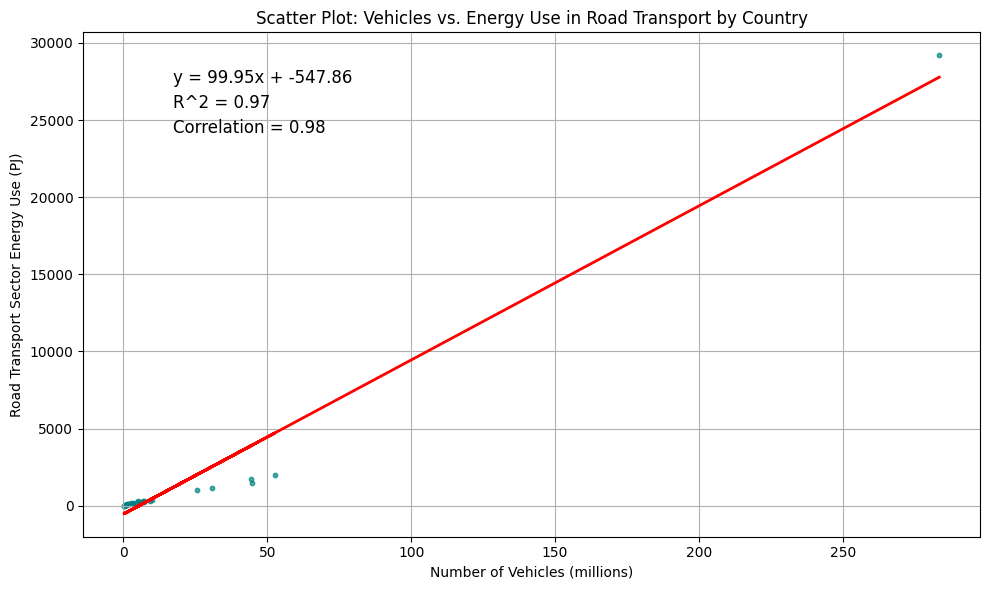

In [48]:
# 'vehicles' is the total number of vehicles for each country. (in millions)
# 'energy' is the corresponding energy use in the transport sector (in petajoules, PJ).

countries = df_vehicles_eu_usa.index
vehicles = df_vehicles_eu_usa["Vehicles"] / 1000000
energy = df_energy["sum"] / 1000

plt.figure(figsize=(10, 6))
plt.scatter(vehicles, energy, color='teal', s=10, alpha=0.7)

# Annotate each point with the country name.
# for i, country in enumerate(countries):
    # plt.text(vehicles.iloc[i] * 1.01, energy.iloc[i] * 0.99, country, fontsize=10)

plt.xlabel("Number of Vehicles (millions)")
plt.ylabel("Road Transport Sector Energy Use (PJ)")
plt.title("Scatter Plot: Vehicles vs. Energy Use in Road Transport by Country")
plt.grid(True)
plt.tight_layout()

# show trend line, equation, R^2, and correlation coefficient
slope, intercept, r_value, p_value, std_err = linregress(vehicles, energy)
plt.plot(vehicles, slope * vehicles + intercept, color='red', linewidth=2)
plt.text(0.1, 0.9, f"y = {slope:.2f}x + {intercept:.2f}", color='black', fontsize=12, transform=plt.gca().transAxes)
plt.text(0.1, 0.85, f"R^2 = {r_value**2:.2f}", color='black', fontsize=12, transform=plt.gca().transAxes)
plt.text(0.1, 0.8, f"Correlation = {r_value:.2f}", color='black', fontsize=12, transform=plt.gca().transAxes)

plt.show()

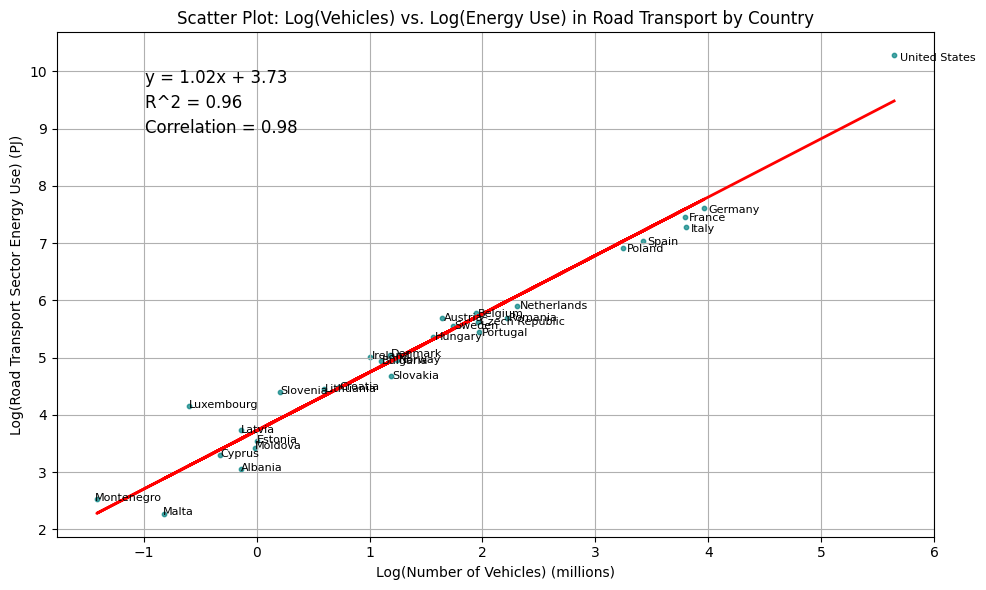

In [49]:
# Apply log transformation to the data
vehicles_log = np.log(vehicles)
energy_log = np.log(energy)

plt.figure(figsize=(10, 6))
plt.scatter(vehicles_log, energy_log, color='teal', s=10, alpha=0.7)

# Annotate each point with the country name.
for i, country in enumerate(countries):
    plt.text(vehicles_log.iloc[i] * 1.01, energy_log.iloc[i] * 0.99, country, fontsize=8)

plt.xlabel("Log(Number of Vehicles) (millions)")
plt.ylabel("Log(Road Transport Sector Energy Use) (PJ)")
plt.title("Scatter Plot: Log(Vehicles) vs. Log(Energy Use) in Road Transport by Country")
plt.grid(True)
plt.tight_layout()

# show trend line, equation, R^2, and correlation coefficient
slope, intercept, r_value, p_value, std_err = linregress(vehicles_log, energy_log)
plt.plot(vehicles_log, slope * vehicles_log + intercept, color='red', linewidth=2)
plt.text(0.1, 0.9, f"y = {slope:.2f}x + {intercept:.2f}", color='black', fontsize=12, transform=plt.gca().transAxes)
plt.text(0.1, 0.85, f"R^2 = {r_value**2:.2f}", color='black', fontsize=12, transform=plt.gca().transAxes)
plt.text(0.1, 0.8, f"Correlation = {r_value:.2f}", color='black', fontsize=12, transform=plt.gca().transAxes)

plt.show()